In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

### The Problem

In [2]:
def f(x, y, alpha):
    return alpha * x * y


x = torch.tensor([0.3], requires_grad=True)
y = torch.tensor([0.6], requires_grad=True)
alphas = [1., 3., 6.]
n_updates = 50
lr = 0.1

### GDA (Gradient Descent Ascent)

In [3]:
def GDA_step(out):
    d_x, d_y = torch.autograd.grad(outputs=out, inputs=[x, y], create_graph=False)
    return d_x, d_y

### Results

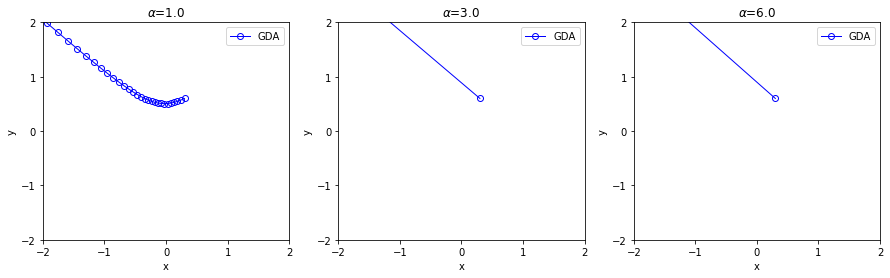

In [4]:
# Execution loops

alg_names = ['GDA']
alg_updates = [GDA_step]

recorder = {alg_name: {f'alpha={alpha}': [[x, y]] for alpha in alphas} for alg_name in alg_names}
for alg_name, alg_update in zip(alg_names, alg_updates):
    for alpha in alphas:
        for i in range(n_updates):
            step_x, step_y = alg_update(f(x, y, alpha))
            x = x - lr * step_x
            y = y - lr * step_y

            recorder[alg_name][f'alpha={alpha}'].append([x,y])

# Plotting

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, alpha in zip(axes, alphas):

    for alg_name in alg_names:
        x_s, y_s = np.array(recorder[alg_name][f'alpha={alpha}']).T
        ax.plot(x_s, y_s, marker='o', color='blue', fillstyle='none', linewidth=1, label=alg_name)

    ax.set_title(rf'$\alpha$={alpha}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.locator_params('x', nbins=5)
    ax.locator_params('y', nbins=5)
    ax.legend(loc='upper right')
plt.show()